In [1]:
# Расчет варианта

import numpy as np
from matplotlib import pyplot as plt
from scipy import linalg

I = 7
N=15+I  
print(f'Номер варианта : {N}')

Номер варианта : 22


Дана функция  . Приблизить функцию  методом интерполяции, используя многочлен Лагранжа. Степень многочлена N подобрать экспериментально  таким образом, чтобы максимальная величина погрешности на отрезке   не превышала заданной величины ε=10^(-6) . Построить графики функции,  многочлена  и график погрешностей.                     

In [2]:
def f(x):
    return np.sign(x)*np.abs(x)**(1/3) + 1

def Init(a,b,n):
    h = abs(b-a)/n
    x = np.zeros(n + 1)
    for i in range(n + 1):
        x[i] = a + h* i
    y = f(x)
    return (x, y)

def Lagrange(x,y,n,t):
    result = 0
    for i in range (n): 
        k = 1
        for j in range (n):
            if i != j:
                k = k * ((t-x[j])/(x[i]-x[j]))
        result = result +y[i]*k
    return result

def Pogresh(x,y,n,t):
    return abs(Lagrange(x,y,n,t) - f(t))


[-2. -1.  0.  1.  2.] [-0.25992105  0.          1.          2.          2.25992105]


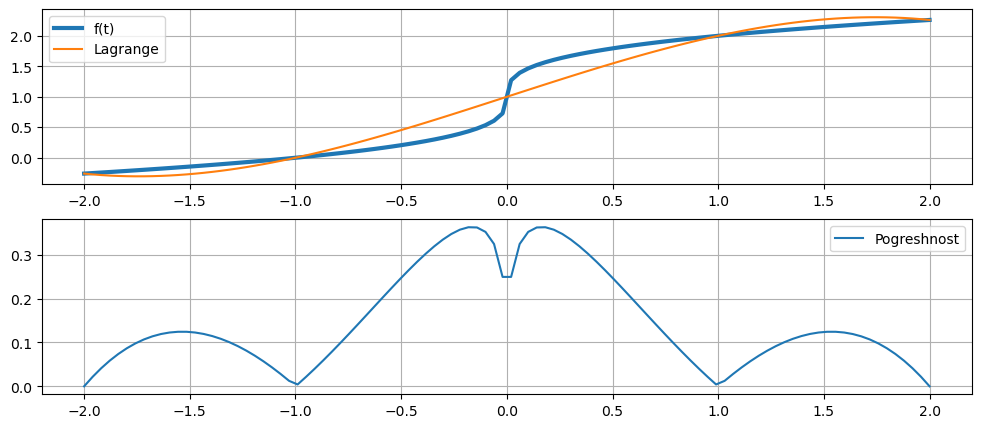

In [3]:
n = 4
a = -2
b = 2
t = np.linspace(a,b, 100)
x, y = Init(a,b, n)
print(x, y)

RL = Pogresh(x,y,n,t)

fig,axs=plt.subplots(2,1,figsize=(12,5))

axs[0].plot(t,  f(t),linewidth=3,label='f(t)')
axs[0].plot(t,Lagrange(x,y,n,t),label = 'Lagrange')
axs[0].grid()
axs[0].legend()

axs[1].plot(t,RL,label = 'Pogreshnost')
axs[1].grid()
plt.legend()

In [4]:
# Найдем наше n
print(max(RL))

0.3630128946315856


In [5]:
eps = 1e-6
minim = np.max(RL)
n=5
print(n)
while (np.max(RL) > eps)and(n<100):
    n+=1
    x,y = Init(a,b,n)
    RL = Pogresh(x,y,n,t)
    if minim> np.max(RL):
        minim = np.max(RL)
        n1 = n
print(n1, minim)

5
8 0.278178315072266


Если не накладывать дополнительных ограничений на цикл, то он "заклится", поэтому ничего не остается кроме того, чтобы найти минимальную погрешность, и как видно из результата она далеко не сохраняет точность

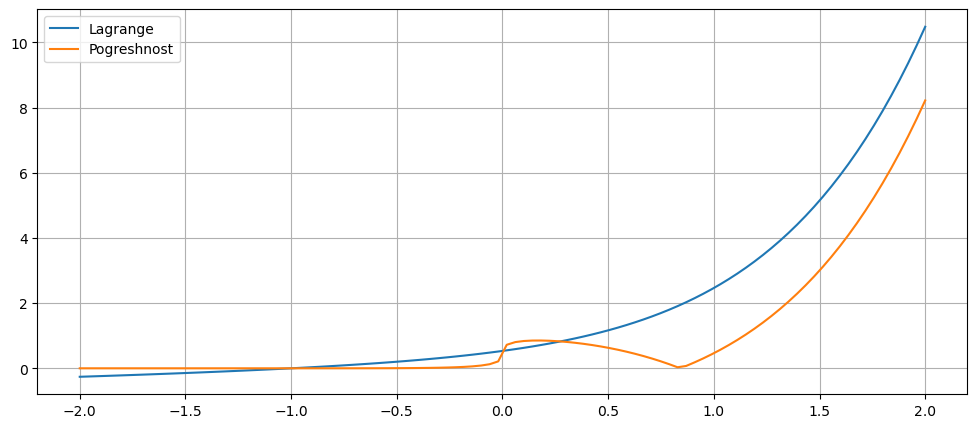

In [6]:
n = n1
fig,axs=plt.subplots(1,figsize=(12,5))
axs.plot(t,Lagrange(x,y,n,t),label = 'Lagrange')
axs.plot(t,Pogresh(x,y,n,t),label = 'Pogreshnost')
axs.grid()
axs.legend()


## Задание 5.3

В таблице  5.2  приведены данные о численности населения некоторых крупнейших стран мира по годам с 1950 -2000 г.г. 
Заполнить последние два столбца таблицы (взять сведения из интернета).
На основе этих данных для конкретного варианта построить наилучший многочлен  по МНК.  
Найти численность  населения страны  в 2023 году  и сравнить полученное значение  с актуальным значением  (взять из интернета). Решить ту же  задачу на основе интерполяционного многочлена.  То есть построить интерполяционный многочлен по значениям с 1950-2020 г.г и выполнить прогноз на 2023 год.  Сравнить с актуальными данными.  Составить отчет по задаче.


Тайвань	11.5	13.5	16	18	21	23.5 23.2 23.5	

[1950 1960 1970 1980 1990 2000 2010 2020]


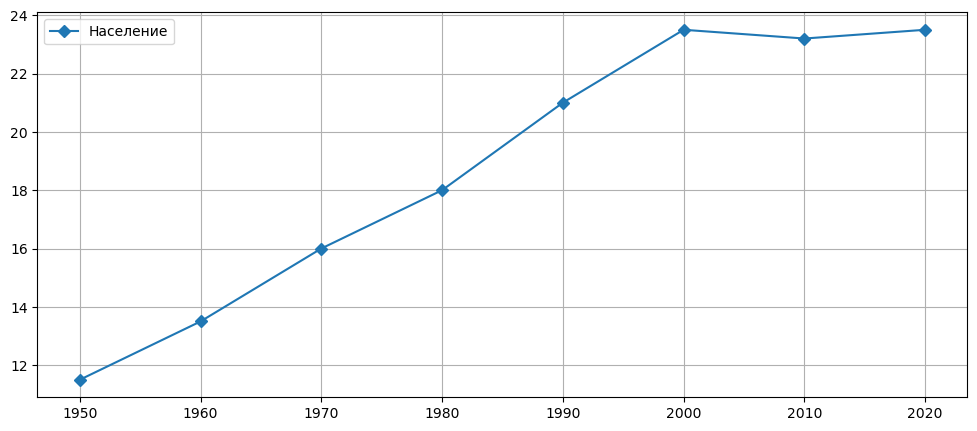

In [7]:
x = np.array([i for i in range(1950, 2030, 10)])
print(x)
y = np.array([11.5,13.5,16,18,21,23.5,23.2,23.5])

fig,axs = plt.subplots(1,figsize=(12,5))

axs.plot(x,  y,marker='D', label='Население')
axs.grid()
axs.legend()


[[1.95e+03 1.00e+00]
 [1.96e+03 1.00e+00]
 [1.97e+03 1.00e+00]
 [1.98e+03 1.00e+00]
 [1.99e+03 1.00e+00]
 [2.00e+03 1.00e+00]
 [2.01e+03 1.00e+00]
 [2.02e+03 1.00e+00]]
0.1880952380952378
-354.594047619047


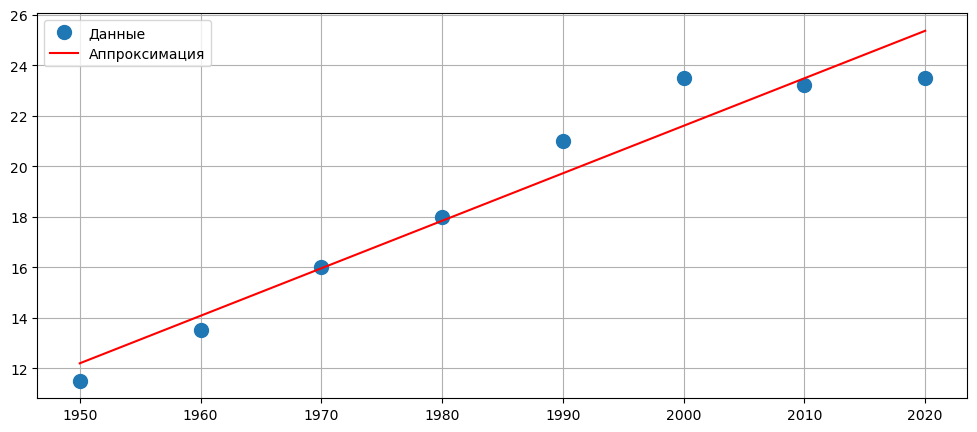

In [8]:


A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
print(A)
print(m)
print(c)

fig,axs = plt.subplots(1,figsize=(12,5))

axs.plot(x, y, 'o', label='Данные', markersize=10)
axs.plot(x, m * x + c, 'r', label='Аппроксимация')
axs.grid()
axs.legend()



In [9]:
# Метод наименьших квадратов
def MNK(m, y, x):
    matrix = np.zeros((m, m))
    b = np.zeros(m)
    for i in range(m):
        for j in range(m):
            for n in range(len(x)):
                matrix[i][j] += x[n]**(i+j)

        for n in range(len(x)):
            b[i] += y[n] * x[n]**i

    return np.linalg.solve(matrix, b)

def F(x, a):
    result = 0 
    for i in range(len(a)):
        result += a[i] * x ** i
    return result

def Otklonenie(F, y, n):
    result = 0
    for i in range(len(x)):
        result += (F[i] - y[i]) ** 2
    return np.sqrt((1/(n+1))*result)

minim = 10**10
for i in range(1, len(x)):
    a = MNK(i, y, x)
    if minim > Otklonenie(F(x, a), y, i):
        minim = Otklonenie(F(x, a), y, i)
        n = i

        
        
a = MNK(n, y, x)
print(x)
print(y)

print(F(x, a))




# Заметили, что среднее квадратичное отклонение минимально при n = 2
        
a = MNK(2, y, x)
print(x)
print(y)

print(F(x, a))


[1950 1960 1970 1980 1990 2000 2010 2020]
[11.5 13.5 16.  18.  21.  23.5 23.2 23.5]
[12.19166667 14.07261905 15.95357143 17.83452381 19.71547619 21.59642857
 23.47738095 25.35833333]
[1950 1960 1970 1980 1990 2000 2010 2020]
[11.5 13.5 16.  18.  21.  23.5 23.2 23.5]
[12.19166667 14.07261905 15.95357143 17.83452381 19.71547619 21.59642857
 23.47738095 25.35833333]


Прогноз на 2023 год МНК: 25.358333333332382 


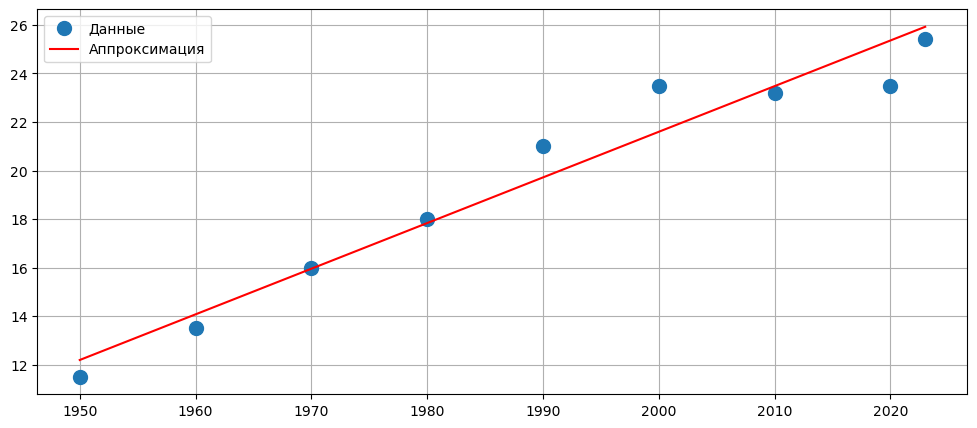

In [10]:
# Долгожданные ПРОГНОЗЫ, ох уж эта ваша изотерика

print(f'Прогноз на 2023 год МНК: {F(x, a)[-1]} ')
fig,axs = plt.subplots(1,figsize=(12,5))

x = np.array([1950,1960,1970,1980,1990,2000,2010,2020,2023])
y = np.array([11.5,13.5,16,18,21,23.5,23.2,23.5, 25.4])

axs.plot(x, y, 'o', label='Данные', markersize=10)
axs.plot(x, F(x,a), 'r', label='Аппроксимация')
axs.grid()
axs.legend()


In [11]:
def send_Lnj(t, j, t_arr):
    lnj = 1
    for i in range(np.shape(t_arr)[0]):
        if i != j:
            lnj = lnj * ((t - t_arr[i]) / (t_arr[j] - t_arr[i]))

    return lnj

def lagrange(t, t_arr, y_arr):
    Lnt = 0
    for i in range(np.shape(y_arr)[0]):
        lnj = send_Lnj(t, i, t_arr)
        Lnt = Lnt + (y_arr[i] * lnj)
    return Lnt

Прогноз на 2023 год МНК: 25.4 


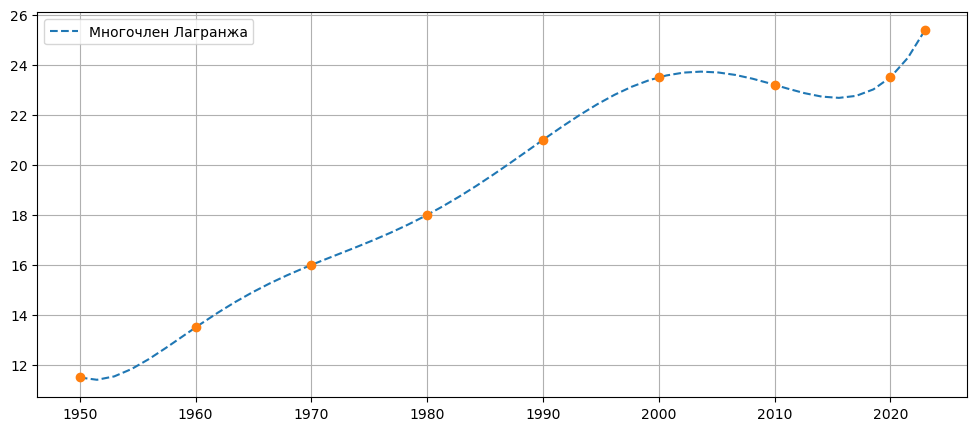

In [12]:

print(f'Прогноз на 2023 год МНК: {Lagrange(x,y,len(x),2023)} ')



fig,axs = plt.subplots(1,figsize=(12,5))
x = np.array([1950,1960,1970,1980,1990,2000,2010,2020,2023])
y = np.array([11.5,13.5,16,18,21,23.5,23.2,23.5, 25.4])

x_i = np.linspace(1950,2023)
y_i = [lagrange(t, x, y) for t in x_i]
plt.plot(x_i, y_i, label = "Многочлен Лагранжа", linestyle = '--')


axs.plot(x, y , 'o')
axs.grid()
axs.legend()


In [13]:
# Так себе прогноз


23,42млн человеr данные из интернета
При сравнении данных из интернета и полученных, выявлено, что МНК чуть точнее установил сколько человек будет жить в Тайване в 2023 году

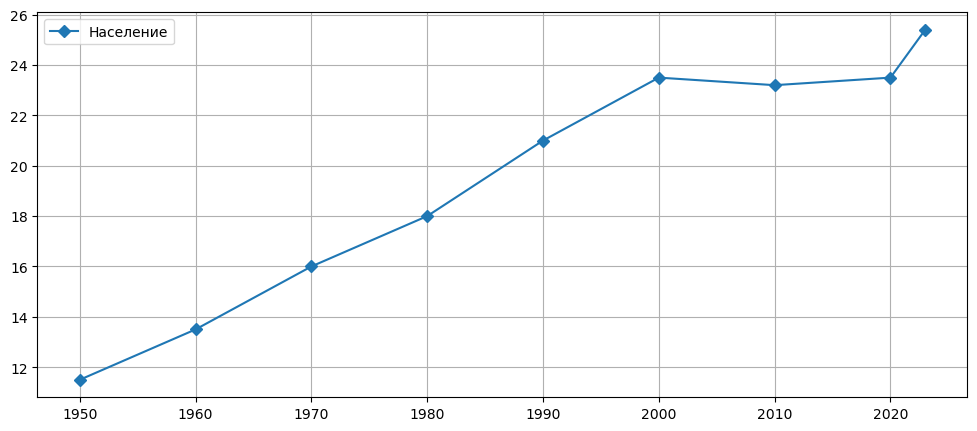

In [14]:
x = np.array([1950,1960,1970,1980,1990,2000,2010,2020,2023])
y = np.array([11.5,13.5,16,18,21,23.5,23.2,23.5, 25.4])
fig,axs = plt.subplots(1,figsize=(12,5))

axs.plot(x,  y,marker='D', label='Население')
axs.grid()
axs.legend()


Функция f(x) является кусочно-гладкой функцией   (см. таблицу 5.1). Приблизить функцию  многочленом Лагранжа степени N, где N найдено  в задаче 5.1. 
Предложить и реализовать способ интерполяции, при котором величина погрешности  не будет превышать величины  .     


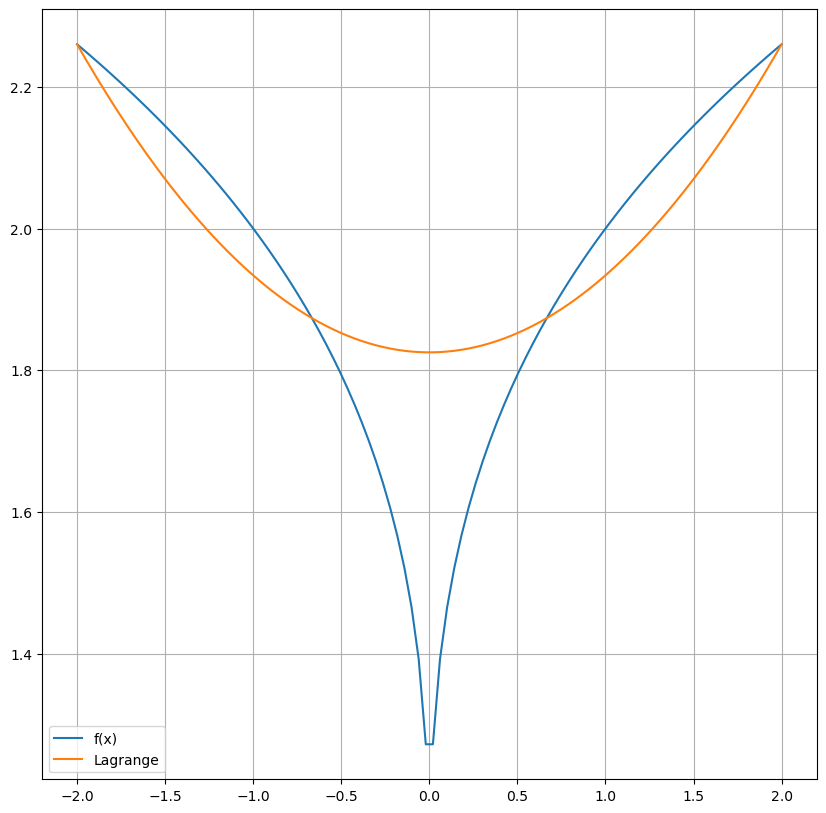

In [15]:
def f(x):
    return np.abs(x)**(1/3) + 1

a = -2
b = 2
x = np.linspace(a,b,100)
y = f(t)
n = 3
t = np.linspace(a,b, 100)
x0, y0 = Init(a,b, n)

fig,axs = plt.subplots(1,figsize=(10,10))
axs.plot(t,  y, label='f(x)')
axs.plot(t,  Lagrange(x0,y0,n,t), label='Lagrange')
axs.plot()
# axs.plot(x, np.zeros(100))
axs.grid()
axs.legend()



In [16]:
# два отрезка
a1= -2
b1 = 0 
n1 = 1
x1,y1 = Init(a1,b1,n1)
t1 = np.linspace(a1,b1, 100)
RL1 = Pogresh(x1,y1,n1,t1)
print(max(RL1))


n=0
minim= 10**10
eps = 10**(-10)
while (np.max(RL1) > eps) and (n1<100):
    n1+=1
    x1,y1 = Init(a1,b1,n1)
    RL1 = Pogresh(x1,y1,n1,t1)
    if minim> np.max(RL1):
        minim = np.max(RL1)
        n = n1
print(n, minim)


 # тоже самое делаем для [-1, 2]
a2= 0
b2 = 2 
n2 = 1
x2,y2 = Init(a2,b2,n2)
t2 = np.linspace(a2,b2, 100)
RL2 = Pogresh(x2,y2,n2,t2)
print(max(RL2))

minim = 10**10
n = 0
while (np.max(RL2) > eps) and (n2<100):
    n2+=1
    x2,y2 = Init(a2,b2,n2)
    RL2 = Pogresh(x2,y2,n2,t2)
    if minim> np.max(RL2):
        minim = np.max(RL2)
        n = n2

print(n, minim)

# Построим графики





1.2599210498948734
49 0.07644112269903758
1.2599210498948734
48 0.047635749038531294


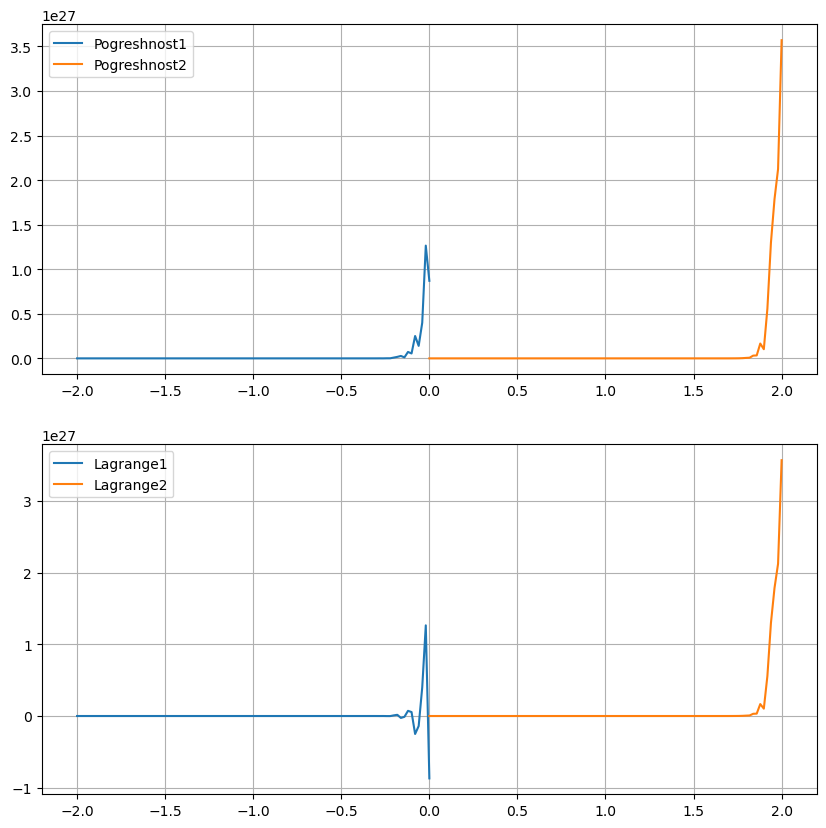

In [17]:
fig,axs=plt.subplots(2,1,figsize=(10,10))
axs[1].plot(t1,Lagrange(x1,y1,49,t1),label = 'Lagrange1')
axs[0].plot(t1,Pogresh(x1,y1,49,t1),label = 'Pogreshnost1')
axs[1].plot(t2,Lagrange(x2,y2,48,t2),label = 'Lagrange2')
axs[0].plot(t2,Pogresh(x2,y2,48,t2),label = 'Pogreshnost2')

axs[0].grid()
axs[0].legend()
axs[1].grid()
axs[1].legend()